Upload your CSV file...


Saving energy_consumption.csv to energy_consumption (5).csv

First 5 rows of dataset:
     customer_id customer_type    regions  building_size_m2  occupants  \
0  CUSTOMER_0001   residential  Northeast                24          2   
1  CUSTOMER_0002    commercial    Midwest                24          1   
2  CUSTOMER_0003    commercial  Southeast                24          1   
3  CUSTOMER_0004   residential  Northeast                45          4   
4  CUSTOMER_0005   residential  Southeast                45          4   

   energy_cost_brl  
0            64.51  
1            55.26  
2            74.54  
3           147.06  
4           143.06  

Target converted into 3 classes!

Running 5-Fold Cross Validation...

Fold Accuracy: 0.438
Fold Accuracy: 0.424
Fold Accuracy: 0.434
Fold Accuracy: 0.428
Fold Accuracy: 0.431

 K-Fold Completed!
Average Accuracy: 0.431

Accuracy Table:
   Fold  Accuracy
0     1     0.438
1     2     0.424
2     3     0.434
3     4     0.428
4     5     0.43

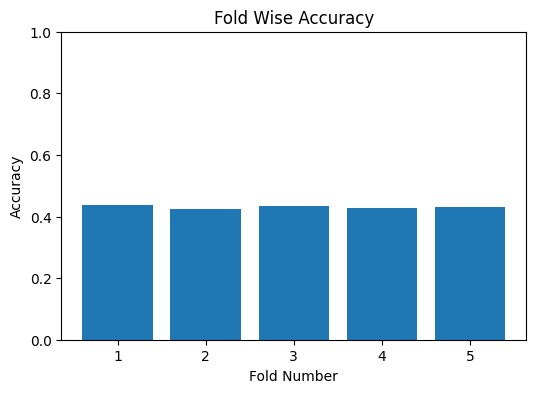

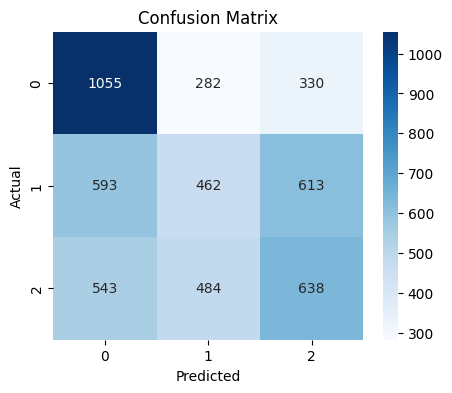

In [6]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Upload your CSV file...")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print("\nFirst 5 rows of dataset:")
print(df.head())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

if y.dtype != 'object' and y.nunique() > 10:
    y = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])
    print("\nTarget converted into 3 classes!")

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)
accuracies = []
all_true = []
all_pred = []

print(f"\nRunning {k}-Fold Cross Validation...\n")

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    all_true.extend(y_test)
    all_pred.extend(y_pred)

    print("Fold Accuracy:", round(acc, 3))

avg_acc = sum(accuracies)/k
print("\n K-Fold Completed!")
print("Average Accuracy:", round(avg_acc, 3))


acc_df = pd.DataFrame({"Fold": range(1, k+1), "Accuracy": accuracies})
print("\nAccuracy Table:")
print(acc_df)


plt.figure(figsize=(6,4))
plt.bar(range(1, k+1), accuracies)
plt.title("Fold Wise Accuracy")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


cm = confusion_matrix(all_true, all_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

